In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Questão A

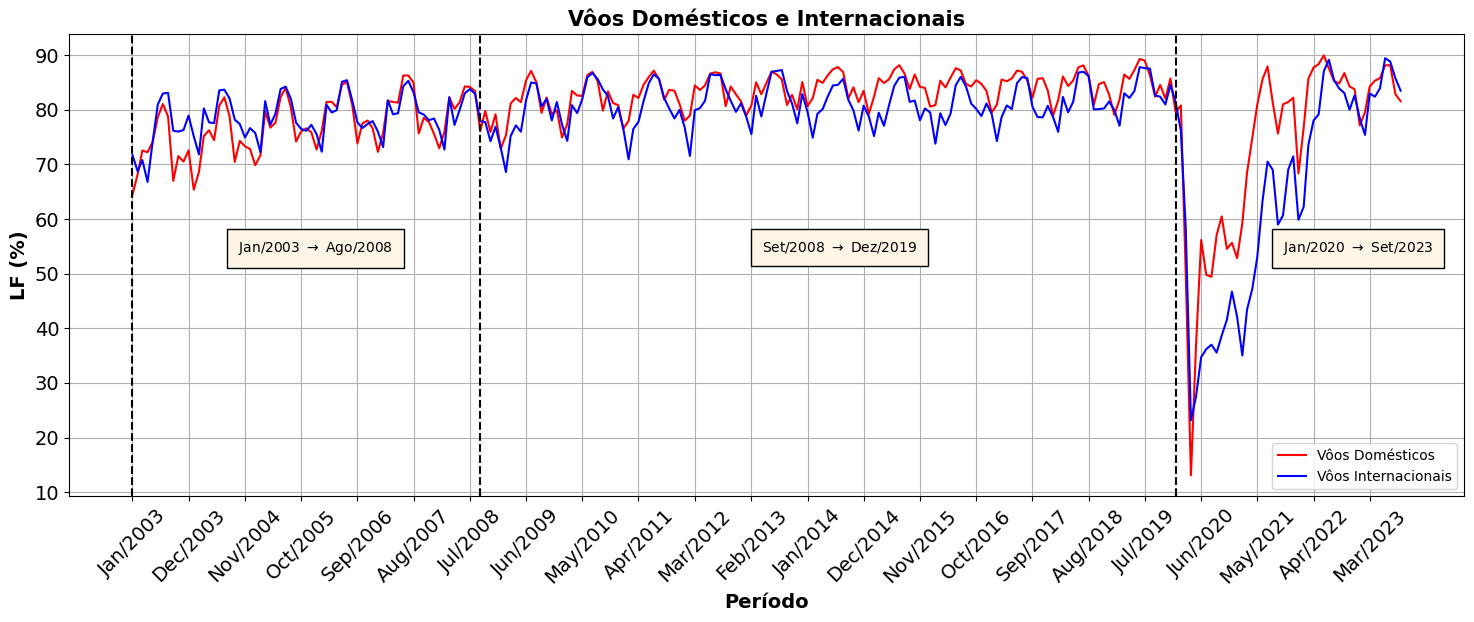

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marckcode/IA048A_MachineLearning/main/Trabalho%201/air%20traffic.csv')
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

series = pd.concat([df.iloc[:, -1], df['LF']], axis=1).set_index(df['date']).drop('date', axis=1)
fig, ax = plt.subplots(1,1, figsize=(18, 6))
ax.plot(df['date'], df['Dom_LF'], label ='Vôos Domésticos', color='red')
ax.plot(df['date'], df['Int_LF'], label ='Vôos Internacionais', color='blue')

first_date = pd.Timestamp('2003-01-01')
second_date = pd.Timestamp('2008-09-01')
third_date = pd.Timestamp('2020-01-01')

# plt.axvline(first_date,  color='r', ls='--', label=fr'First Range Jan/2003 $\rightarrow$ Ago/2008')
# plt.axvline(second_date, color='r', ls='--', label=fr'Second Range Set/2008 $\rightarrow$ Dez/2019')
# plt.axvline(third_date,  color='r', ls='--', label=fr'Third Range Jan/2020 $\rightarrow$ Set/2023')

ax.axvline(first_date,  color='k', ls='--')
ax.axvline(second_date, color='k', ls='--')
ax.axvline(third_date,  color='k', ls='--')


xticks_range = pd.date_range(start='2003-01-01', end='2023-09-01', freq='11MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

ax.text(12680, 54, r'Jan/2003 $\rightarrow$ Ago/2008', bbox={'facecolor': 'oldlace', 'alpha': 1, 'pad': 8})
ax.text(15800, 54, r'Set/2008 $\rightarrow$ Dez/2019', bbox={'facecolor': 'oldlace', 'alpha': 1, 'pad': 8})
ax.text(18900, 54, r'Jan/2020 $\rightarrow$ Set/2023', bbox={'facecolor': 'oldlace', 'alpha': 1, 'pad': 8})

ax.set_title('Vôos Domésticos e Internacionais', weight='bold', fontsize=15)
ax.set_xlabel('Período', weight='bold', fontsize=14)
ax.set_ylabel('LF (%)', weight='bold', fontsize=14)
plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
ax.grid(True)
ax.legend()
plt.show()

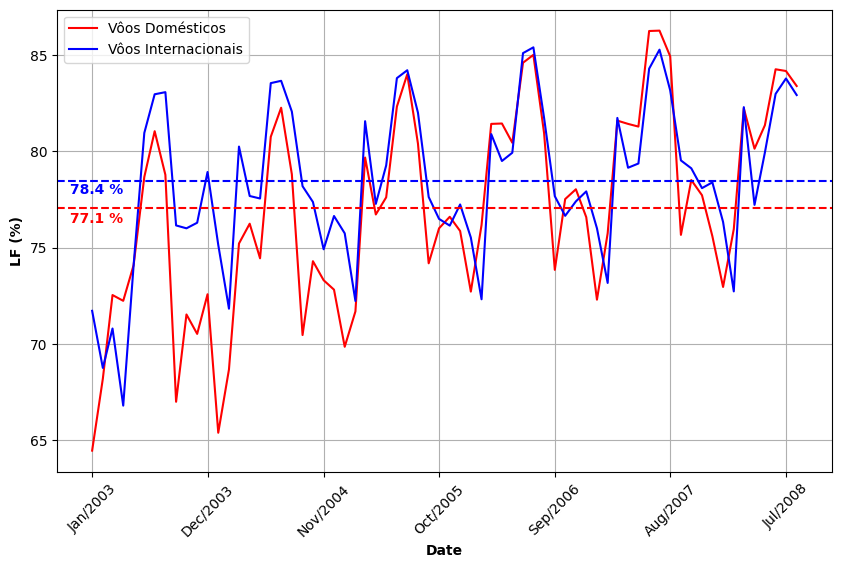

In [ ]:
# first period
first_period = df[df['date'] < pd.Timestamp('2008-08-31')]

#plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(first_period['date'], first_period['Dom_LF'], label='Vôos Domésticos', color='red')
plt.plot(first_period['date'], first_period['Int_LF'], label='Vôos Internacionais', color='blue')

xticks_range = pd.date_range(start='2003-01-01', end='2008-08-31', freq='11MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

plt.axhline(first_period['Dom_LF'].mean(),  color='red', ls='--')
plt.axhline(first_period['Int_LF'].mean(),  color='blue', ls='--')
plt.text(11990, 76.3, f"{round(first_period['Dom_LF'].mean(), 1)} %", weight='bold', color='red')
plt.text(11990, 77.8, f"{round(first_period['Int_LF'].mean(), 1)} %", weight='bold', color='blue')

plt.grid(True)
# plt.title('Vôos entre Jan/2003 e Ago/2008', weight='bold', fontsize=15)
plt.xlabel('Date', weight='bold')
plt.ylabel('LF (%)', weight='bold')
plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=10)
plt.legend()
plt.show()

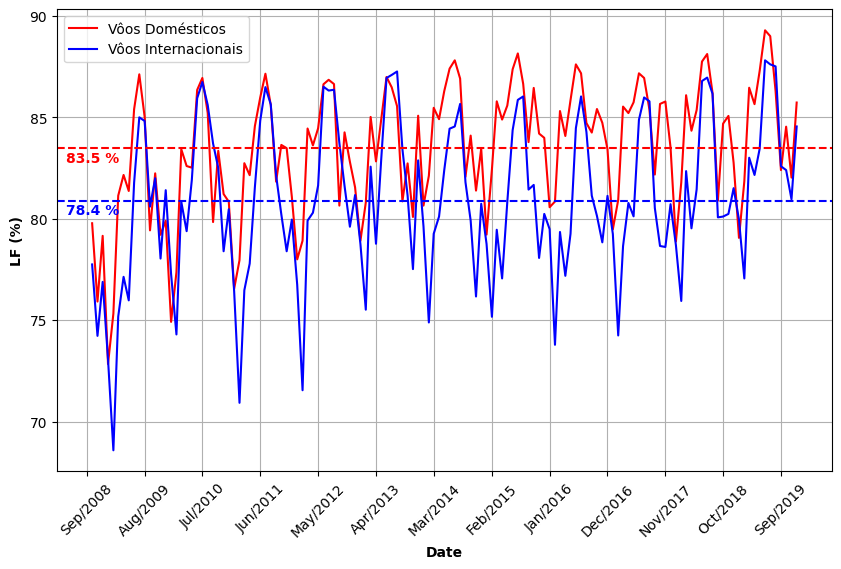

In [ ]:
# second period
second_period = df[df['date'] > pd.Timestamp('2008-09-01')]
second_period = second_period[second_period['date'] < pd.Timestamp('2019-12-31')]

#plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(second_period['date'], second_period['Dom_LF'], label='Vôos Domésticos', color='red')
plt.plot(second_period['date'], second_period['Int_LF'], label='Vôos Internacionais', color='blue')

plt.axhline(second_period['Dom_LF'].mean(),  color='red', ls='--')
plt.axhline(second_period['Int_LF'].mean(),  color='blue', ls='--')
plt.text(14000, 82.8, f"{round(second_period['Dom_LF'].mean(), 1)} %", weight='bold', color='red')
plt.text(14000, 80.2, f"{round(first_period['Int_LF'].mean(), 1)} %", weight='bold', color='blue')

xticks_range = pd.date_range(start='2008-09-01', end='2019-12-31', freq='11MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

plt.grid(True)
# plt.title('Vôos entre Sep/2008 e Dez/2019', weight='bold', fontsize=15)
plt.xlabel('Date', weight='bold')
plt.ylabel('LF (%)', weight='bold')
plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=10)
plt.legend()
plt.show()

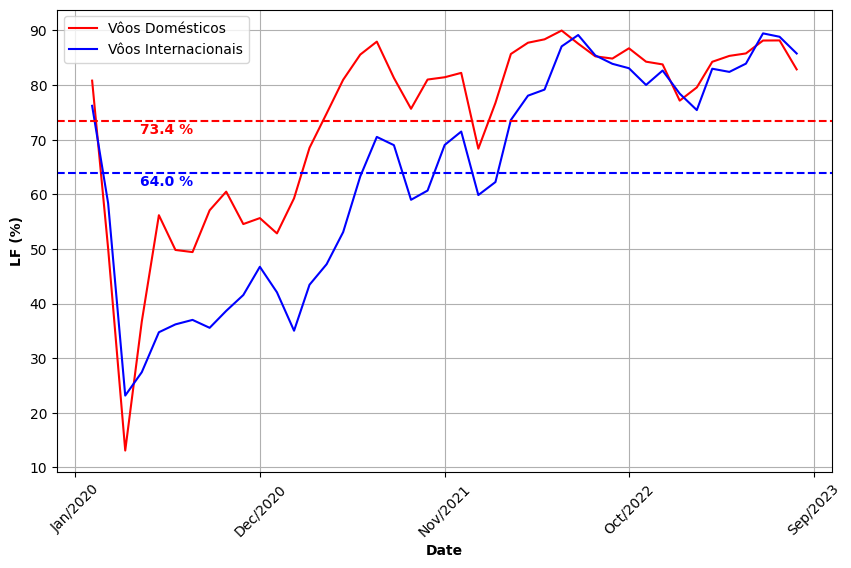

In [ ]:
# third period
third_period = df[df['date'] > pd.Timestamp('2020-01-01')]
third_period = third_period[third_period['date'] < pd.Timestamp('2023-09-01')]

#plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(third_period['date'], third_period['Dom_LF'], label='Vôos Domésticos', color='red')
plt.plot(third_period['date'], third_period['Int_LF'], label='Vôos Internacionais', color='blue')

plt.axhline(third_period['Dom_LF'].mean(),  color='red', ls='--')
plt.axhline(third_period['Int_LF'].mean(),  color='blue', ls='--')
plt.text(18380, 71.05, f"{round(third_period['Dom_LF'].mean(), 1)} %", weight='bold', color='red')
plt.text(18380, 61.6, f"{round(third_period['Int_LF'].mean(), 1)} %", weight='bold', color='blue')

xticks_range = pd.date_range(start='2020-01-01', end='2023-09-01', freq='11MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

plt.grid(True)
# plt.title('Vôos entre Jan/2020 e Sep/2023', weight='bold', fontsize=15)
plt.xlabel('Date', weight='bold')
plt.ylabel('LF (%)', weight='bold')
plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=10)
plt.legend()
plt.show()

# Questão B

In [ ]:
series.head()

,LF
date,
2003-01-01,66.20
2003-02-01,68.31
2003-03-01,72.12
2003-04-01,71.02
2003-05-01,74.07


In [ ]:
156/204

0.7647058823529411

In [ ]:
train_values = series.iloc[:156, :] # 2003 - 2015 (treinamento)
# train_values

In [ ]:
val_values = series.iloc[156:204, :] # 2016 - 2019 (validação)
# val_values

In [ ]:
test_values = series.iloc[204:, :] # 2020 - 2023 (teste)
test_values_2anos = test_values.iloc[24:, :]
# test_values_2anos

In [ ]:
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# dataframe.head()
dataframe

,t-1,t+1
0,NaN,66.20
1,66.20,68.31
2,68.31,72.12
3,72.12,71.02
4,71.02,74.07
...,...,...
244,84.48,85.22
245,85.22,88.52
246,88.52,88.35
247,88.35,83.72


In [ ]:
# split into train and test sets (82% / 18%)
X = dataframe.values
train, val, test = X[0:len(X)-93], X[len(X)-93:len(X)-45], X[len(X)-45:] # testing for 7 values, predictions

train.shape, val.shape, test.shape

((156, 2), (48, 2), (45, 2))

In [ ]:
train_X, val_X, test_X = train[:, 0], val[:, 0], test[:, 0]
train_y, val_y, test_y = train[:, 1], val[:, 1], test[:, 1]

In [ ]:
# train_X, train_y = train[:,0], train[:,1]
# test_X, test_y = test[:,0], test[:,1]

In [ ]:
# split dataset for 1 column
X = series.values
train, val, test = X[0:len(X)-93], X[len(X)-93:len(X)-45], X[len(X)-45:]

In [ ]:
train.shape, val.shape, test.shape

((156, 1), (48, 1), (45, 1))

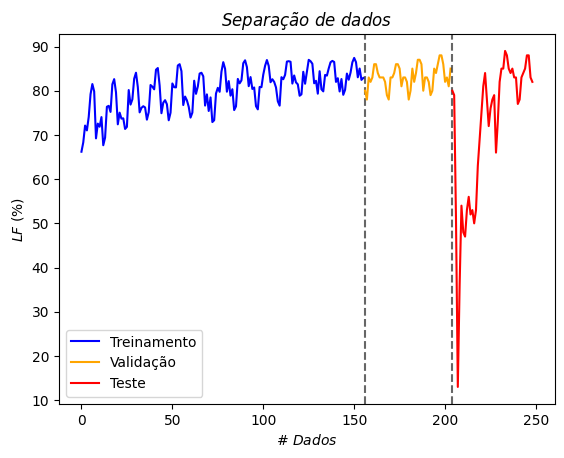

In [ ]:
# print('Observations: %d' % (len(X)))
# print('Training Observations: %d' % (len(train)))
# print('Testing Observations: %d' % (len(test)))
plt.plot(train, color='blue', label='Treinamento')
plt.axvline(x=len(train), color='black', ls='--', alpha=0.6)
plt.plot([None for i in range(len(train))] + [int(x) for x in val], color='orange', label='Validação')
plt.axvline(x=len(train)+len(val), color='black', ls='--', alpha=0.6)
plt.plot([None for i in range(len(train)+len(val))] + [int(x) for x in test], color='red', label='Teste')
plt.title(r'$Separação$ $de$ $dados$')
plt.ylabel(r'$LF$ $(\%)$')
plt.xlabel(r'$\#$ $Dados$')
plt.legend()
plt.show()

## RMSE Curve

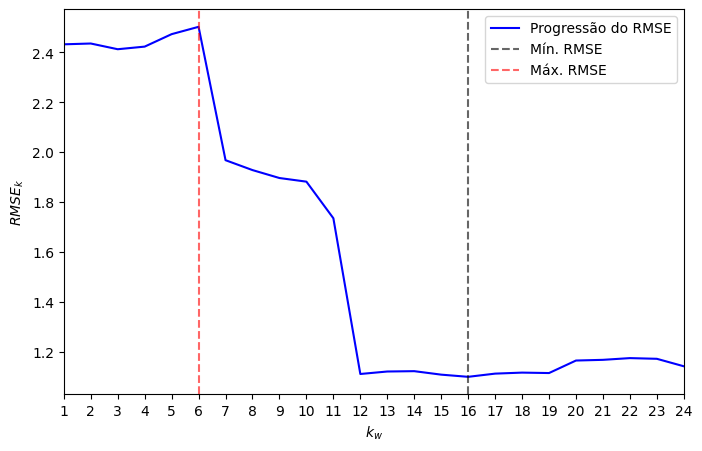

In [ ]:
rmse_list = []
window_list = []
windows = 24

for i in range(1, windows+1):
    window = i
    model = AutoReg(train, lags=window)
    model_fit = model.fit()
    coef = model_fit.params

    # walk forward over time steps in val
    history = train[len(train) - window:]
    history = [history[i] for i in range(len(history))]
    predictions = []

    for t in range(len(val)):
        length = len(history)
        lag = [history[i] for i in range(length-window, length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]

        obs = val[t]
        predictions.append(yhat)
        history.append(obs)

    rmse_list.append(sqrt(mean_squared_error(val, predictions)))
    window_list.append(window)

plt.figure(figsize=(8, 5))
plt.plot(window_list, rmse_list, label='Progressão do RMSE', color='blue')
plt.xlabel(r'$k_w$', weight='bold')
plt.ylabel(r'$RMSE_k$', weight='bold')

plt.axvline(x=window_list[rmse_list.index(min(rmse_list))], linestyle='--', c='black', alpha=0.6, label='Mín. RMSE')
plt.axvline(x=window_list[rmse_list.index(max(rmse_list))], linestyle='--', c='red', alpha=0.6, label='Máx. RMSE')

plt.xlim((1, windows))
plt.xticks(np.arange(1, windows+1))
plt.legend()
plt.show()

In [ ]:
# Definição da função MAPE
def MAPE(y_actual, y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
    return mape

## Complete Plots

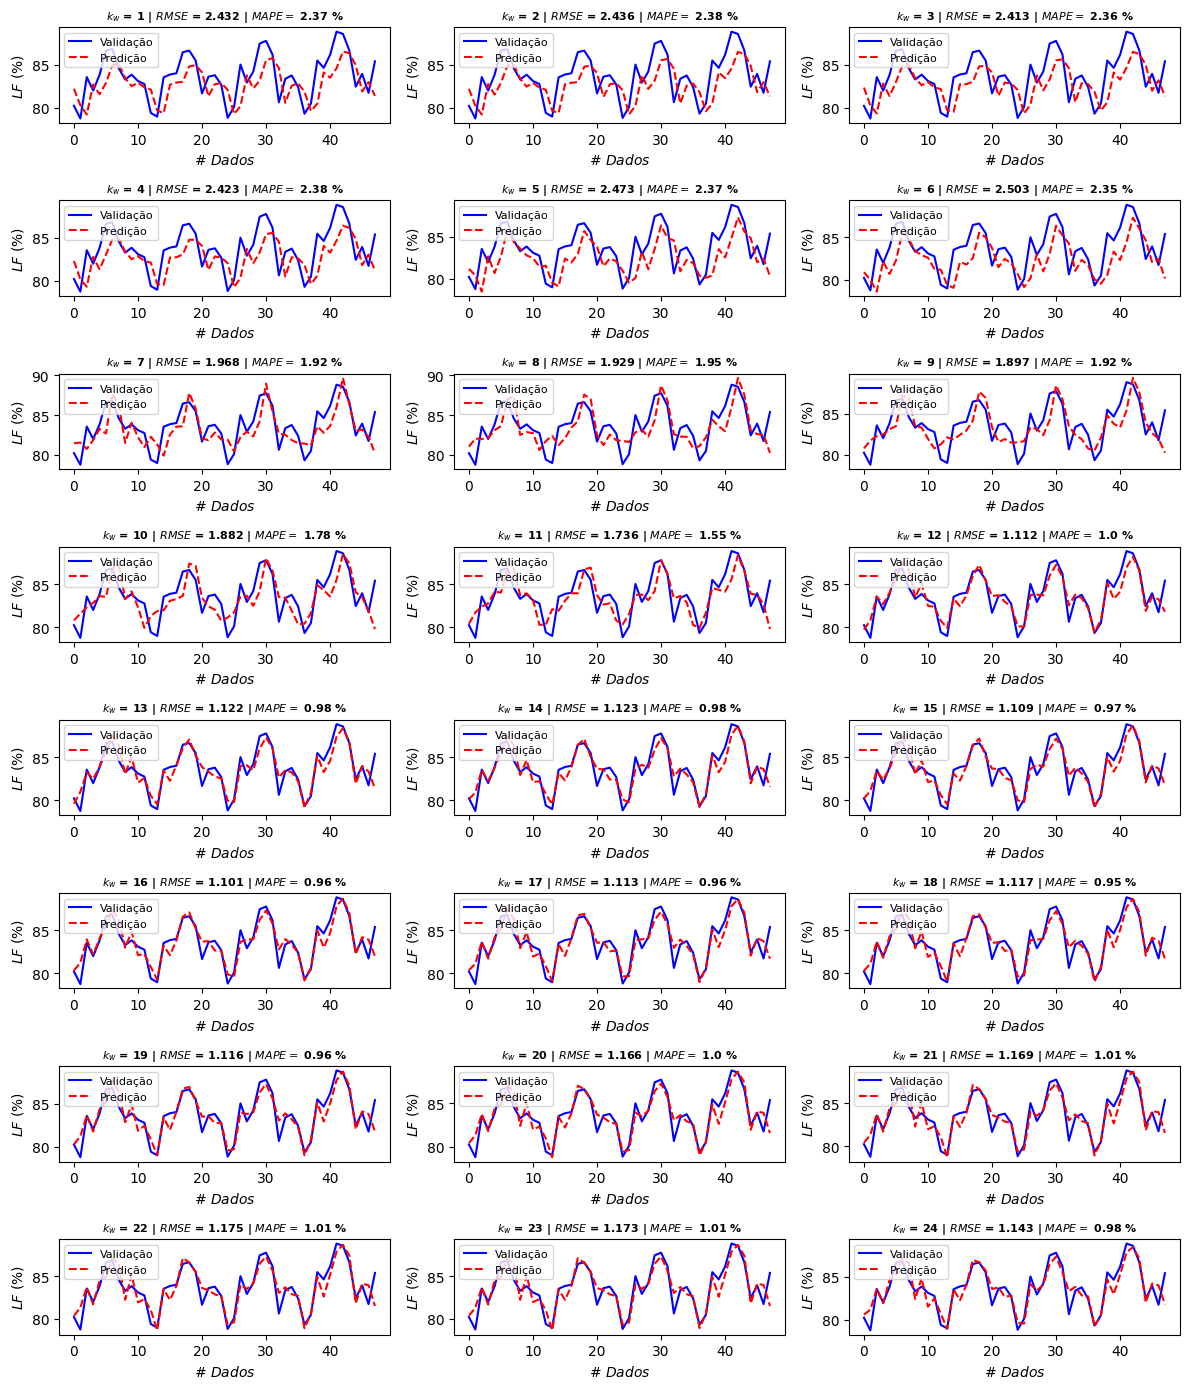

In [ ]:
nrows = 8
ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 14))

i = 1
for nr in range(nrows):
    for nc in range(ncols):
        window = i
        model = AutoReg(train, lags=window)
        model_fit = model.fit()
        coef = model_fit.params

        # walk forward over time steps in val
        history = train[len(train) - window:]
        history = [history[i] for i in range(len(history))]
        predictions = list()

        for t in range(len(val)):
            length = len(history)
            lag = [history[i] for i in range(length-window, length)]
            yhat = coef[0]
            for d in range(window):
                yhat += coef[d+1] * lag[window-d-1]

            obs = val[t]
            predictions.append(yhat)
            history.append(obs)

            #print('predicted=%f, expected=%f' % (yhat, obs))
        i += 1

        rmse = round(sqrt(mean_squared_error(val, predictions)), 3)
        mape = round(MAPE(val, predictions), 2)

        ax[nr][nc].plot(val_y, label='Validação', color='blue')
        ax[nr][nc].plot(predictions, color='red', label='Predição', ls='--')
        ax[nr][nc].set_title(fr'$k_w$ = {window} | $RMSE$ = {rmse} | $MAPE = $ {mape} %', weight='bold', fontsize=8)
        ax[nr][nc].set_xlabel(r'$\#$ $Dados$')
        ax[nr][nc].set_ylabel(r'$LF$ $(\%)$')
        ax[nr][nc].legend(fontsize="8")

plt.tight_layout()
plt.show()

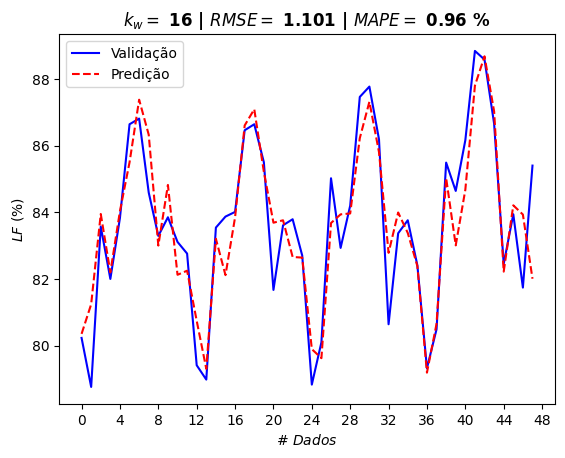

In [ ]:
# train autoregression
window = window_list[rmse_list.index(min(rmse_list))]
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in val
history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(val)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]

    obs = val[t]
    predictions.append(yhat)
    history.append(obs)

rmse = round(sqrt(mean_squared_error(val, predictions)), 3)
mape = round(MAPE(val, predictions), 2)
# print('Min Test RMSE: %.3f' % rmse)
# plot
plt.plot(val_y, label='Validação', color='blue')
plt.plot(predictions, color='red', label='Predição', ls='--')
plt.title(fr'$k_w =$ {window} | $RMSE =$ {rmse} | $MAPE = $ {mape} %', weight='bold')
plt.ylabel(r'$LF$ $(\%)$')
plt.xlabel(r'$\#$ $Dados$')
plt.xticks(np.arange(0, 50, 4))
plt.legend()
plt.show()

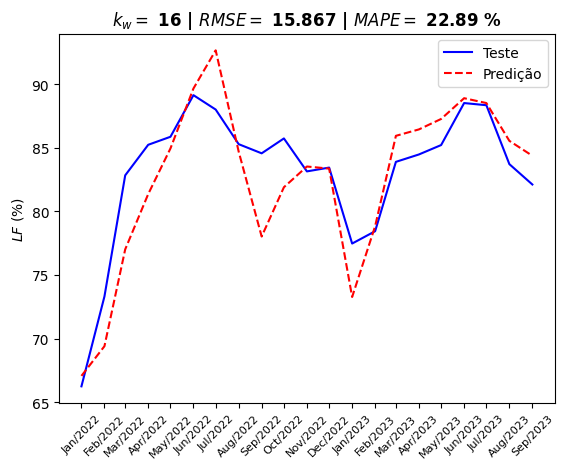

In [ ]:
## Em dados de teste
# train autoregression
window = window_list[rmse_list.index(min(rmse_list))]
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in val
history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]

    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

rmse = round(sqrt(mean_squared_error(test, predictions)), 3)
mape = round(MAPE(test, predictions), 2)

xticks_range = pd.date_range(start='2022-01-01', end='2023-09-01', freq='MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

# plot
plt.plot(xticks_range, test_y[24:], label='Teste', color='blue')
plt.plot(xticks_range, predictions[24:], color='red', label='Predição', ls='--')
plt.title(fr'$k_w =$ {window} | $RMSE =$ {rmse} | $MAPE = $ {mape} %', weight='bold')
plt.ylabel(r'$LF$ $(\%)$')
plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=8)
plt.legend()
plt.show()

# Questão C

In [ ]:
train_values = series.iloc[:204, :] # 2003 - 2019 (treinamento)
# train_values

In [ ]:
val_values = series.iloc[204:228, :]
# val_values

In [ ]:
test_values = series.iloc[228:, :]
# test_values

In [ ]:
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

In [ ]:
# split into train and test sets (82% / 18%)
X = dataframe.values
train, val, test = X[0:len(X)-45], X[len(X)-45:len(X)-21], X[len(X)-21:] # testing for 7 values, predictions

train.shape, val.shape, test.shape

((204, 2), (24, 2), (21, 2))

In [ ]:
train_X, val_X, test_X = train[:, 0], val[:, 0], test[:, 0]
train_y, val_y, test_y = train[:, 1], val[:, 1], test[:, 1]

In [ ]:
# split dataset for 1 column
X = series.values
train, val, test = X[0:len(X)-45], X[len(X)-45:len(X)-21], X[len(X)-21:]

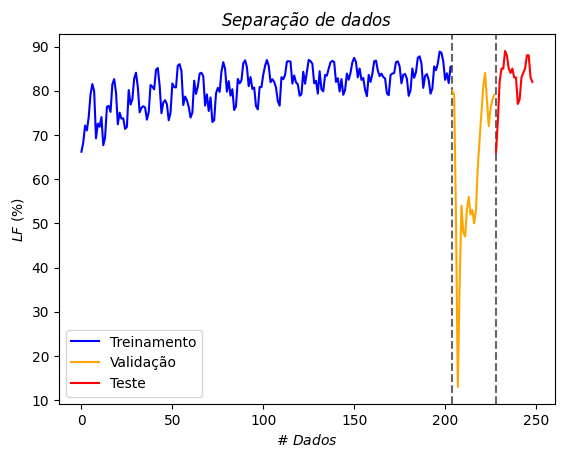

In [ ]:
plt.plot(train, color='blue', label='Treinamento')
plt.axvline(x=len(train), color='black', ls='--', alpha=0.6)
plt.plot([None for i in range(len(train))] + [int(x) for x in val], color='orange', label='Validação')
plt.axvline(x=len(train)+len(val), color='black', ls='--', alpha=0.6)
plt.plot([None for i in range(len(train)+len(val))] + [int(x) for x in test], color='red', label='Teste')
plt.title(r'$Separação$ $de$ $dados$')
plt.ylabel(r'$LF$ $(\%)$')
plt.xlabel(r'$\#$ $Dados$')
plt.legend()
plt.show()

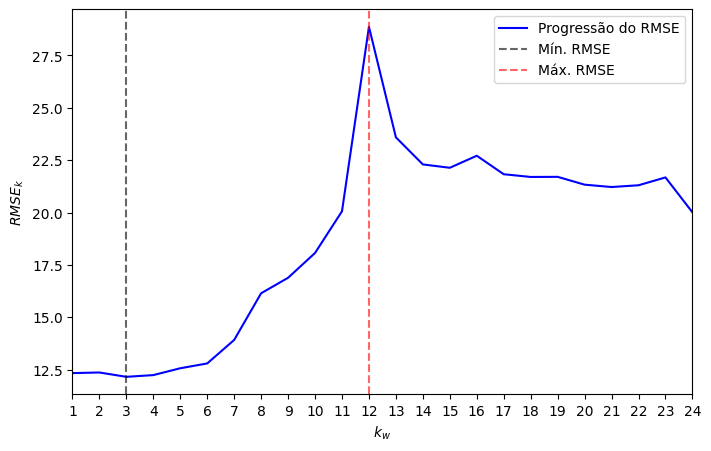

In [ ]:
rmse_list = []
window_list = []
windows = 24

for i in range(1, windows+1):
    window = i
    model = AutoReg(train, lags=window)
    model_fit = model.fit()
    coef = model_fit.params

    # walk forward over time steps in val
    history = train[len(train) - window:]
    history = [history[i] for i in range(len(history))]
    predictions = []

    for t in range(len(val)):
        length = len(history)
        lag = [history[i] for i in range(length-window, length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]

        obs = val[t]
        predictions.append(yhat)
        history.append(obs)

    rmse_list.append(sqrt(mean_squared_error(val, predictions)))
    window_list.append(window)

plt.figure(figsize=(8, 5))
plt.plot(window_list, rmse_list, label='Progressão do RMSE', color='blue')
plt.xlabel(r'$k_w$', weight='bold')
plt.ylabel(r'$RMSE_k$', weight='bold')

plt.axvline(x=window_list[rmse_list.index(min(rmse_list))], linestyle='--', c='black', alpha=0.6, label='Mín. RMSE')
plt.axvline(x=window_list[rmse_list.index(max(rmse_list))], linestyle='--', c='red', alpha=0.6, label='Máx. RMSE')

plt.xlim((1, windows))
plt.xticks(np.arange(1, windows+1))
plt.legend()
plt.show()

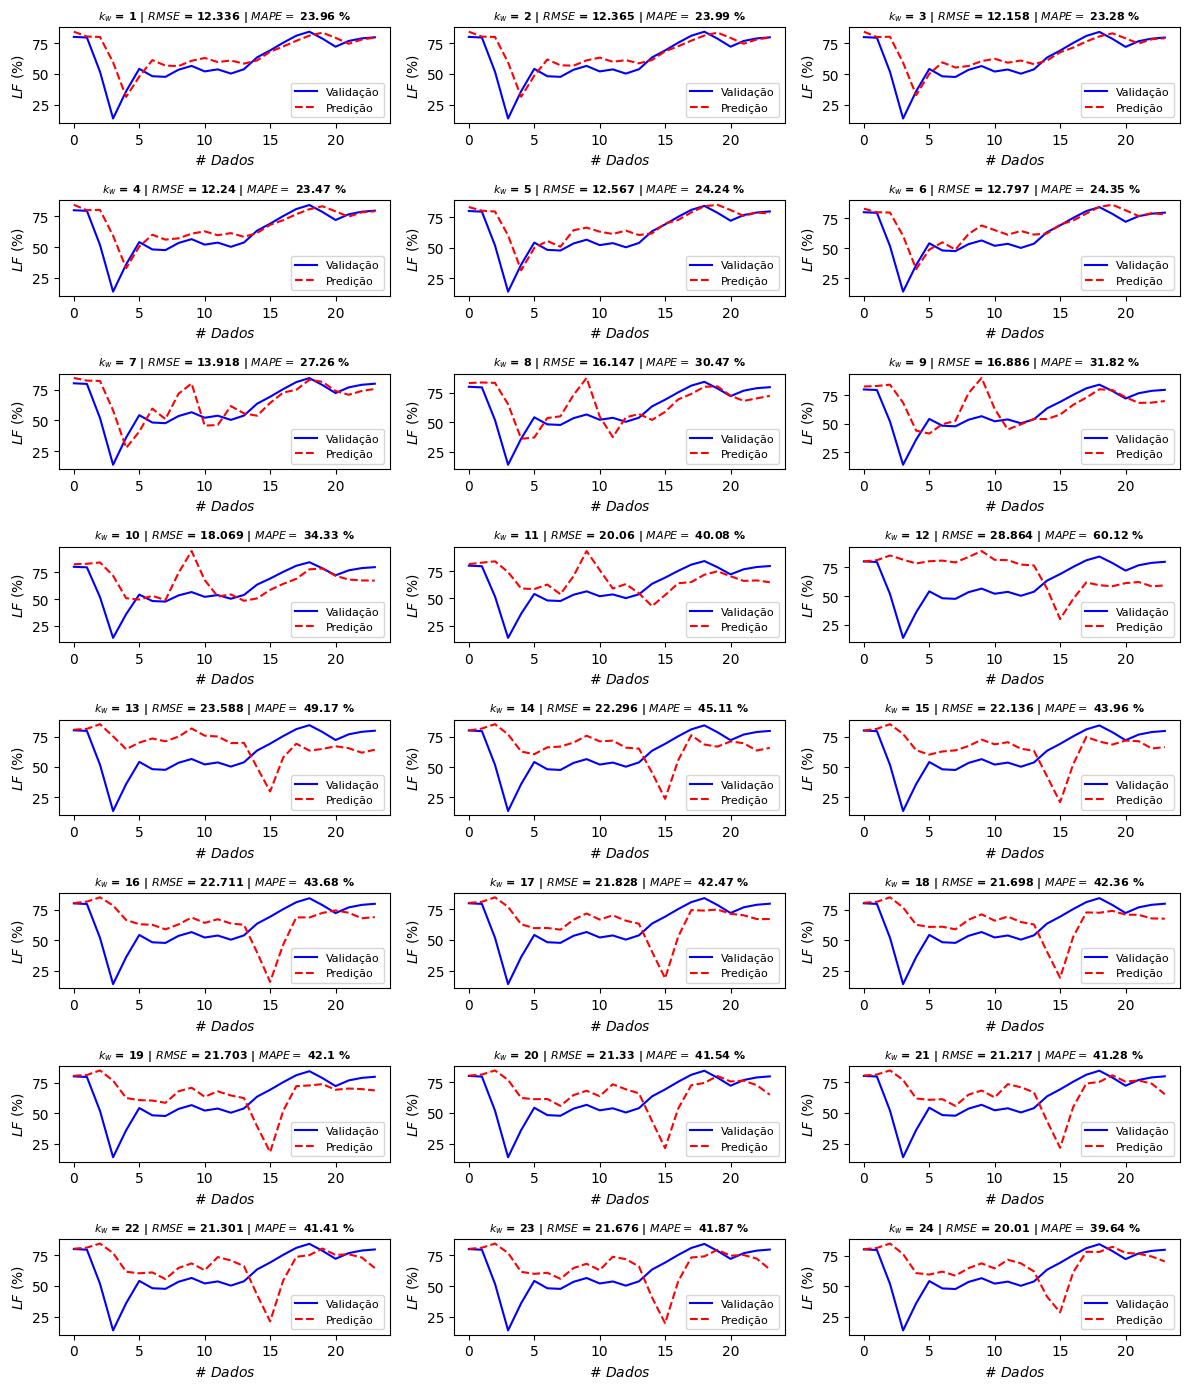

In [ ]:
nrows = 8
ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 14))

i = 1
for nr in range(nrows):
    for nc in range(ncols):
        window = i
        model = AutoReg(train, lags=window)
        model_fit = model.fit()
        coef = model_fit.params

        # walk forward over time steps in val
        history = train[len(train) - window:]
        history = [history[i] for i in range(len(history))]
        predictions = list()

        for t in range(len(val)):
            length = len(history)
            lag = [history[i] for i in range(length-window, length)]
            yhat = coef[0]
            for d in range(window):
                yhat += coef[d+1] * lag[window-d-1]

            obs = val[t]
            predictions.append(yhat)
            history.append(obs)

            #print('predicted=%f, expected=%f' % (yhat, obs))
        i += 1

        rmse = round(sqrt(mean_squared_error(val, predictions)), 3)
        mape = round(MAPE(val, predictions), 2)

        ax[nr][nc].plot(val_y, label='Validação', color='blue')
        ax[nr][nc].plot(predictions, color='red', label='Predição', ls='--')
        ax[nr][nc].set_title(fr'$k_w$ = {window} | $RMSE$ = {rmse} | $MAPE = $ {mape} %', weight='bold', fontsize=8)
        ax[nr][nc].set_xlabel(r'$\#$ $Dados$')
        ax[nr][nc].set_ylabel(r'$LF$ $(\%)$')
        ax[nr][nc].legend(fontsize="8")

plt.tight_layout()
plt.show()

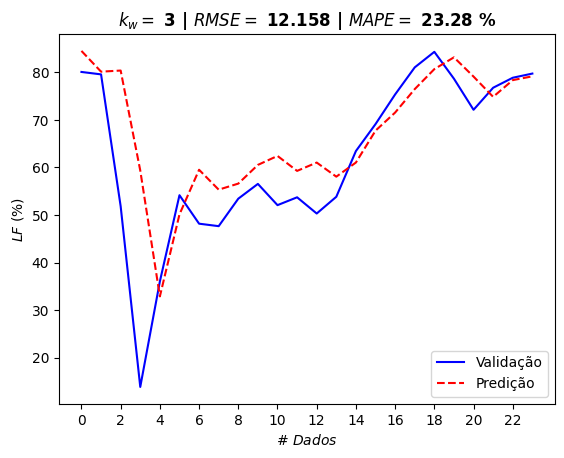

In [ ]:
# train autoregression
window = window_list[rmse_list.index(min(rmse_list))]
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in val
history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(val)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]

    obs = val[t]
    predictions.append(yhat)
    history.append(obs)

rmse = round(sqrt(mean_squared_error(val, predictions)), 3)
mape = round(MAPE(val, predictions), 2)
# print('Min Test RMSE: %.3f' % rmse)
# plot
plt.plot(val_y, label='Validação', color='blue')
plt.plot(predictions, color='red', label='Predição', ls='--')
plt.title(fr'$k_w =$ {window} | $RMSE =$ {rmse} | $MAPE = $ {mape} %', weight='bold')
plt.ylabel(r'$LF$ $(\%)$')
plt.xlabel(r'$\#$ $Dados$')
plt.xticks(np.arange(0, 24, 2))
plt.legend()
plt.show()

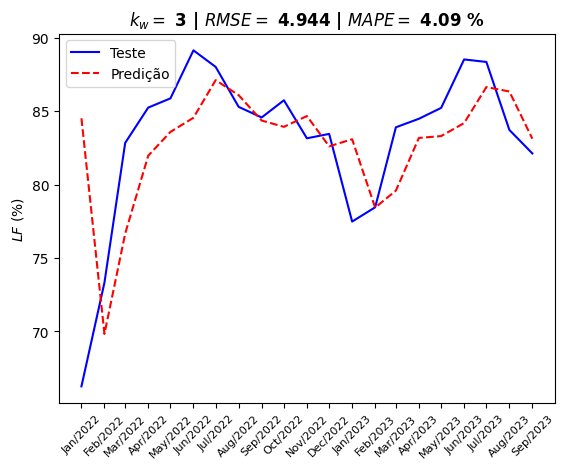

In [ ]:
## Em dados de teste
# train autoregression
window = window_list[rmse_list.index(min(rmse_list))]
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in val
history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]

    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

rmse = round(sqrt(mean_squared_error(test, predictions)), 3)
mape = round(MAPE(test, predictions), 2)

xticks_range = pd.date_range(start='2022-01-01', end='2023-09-01', freq='MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

plt.plot(xticks_range, test_y, label='Teste', color='blue')
plt.plot(xticks_range, predictions, color='red', label='Predição', ls='--')
plt.title(fr'$k_w =$ {window} | $RMSE =$ {rmse} | $MAPE = $ {mape} %', weight='bold')
plt.ylabel(r'$LF$ $(\%)$')
# plt.xlabel(r'$\#$ $Te$')


plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=8)

#plt.xticks(np.arange(0, 24, 2))
plt.legend()
plt.show()

# Linear Regression Analysis

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marckcode/IA048A_MachineLearning/main/Trabalho%201/air%20traffic.csv')
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

series = pd.concat([df.iloc[:, -1], df['LF']], axis=1).set_index(df['date']).drop('date', axis=1)

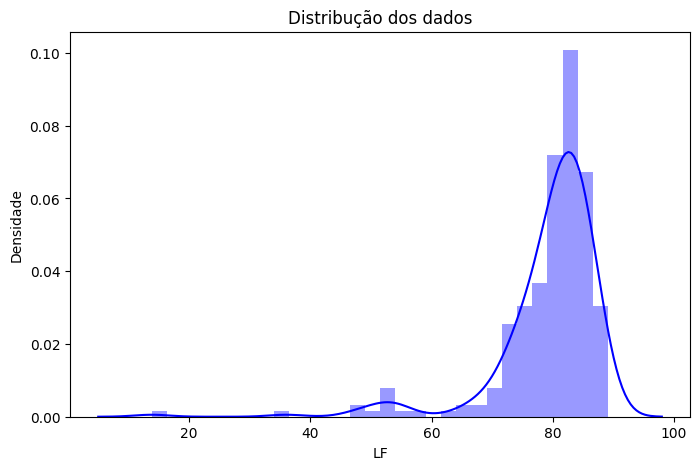

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(series["LF"], kde=True, color='blue', bins=30, ax=ax)
ax.set_ylabel('Densidade')
ax.set_title("Distribução dos dados");

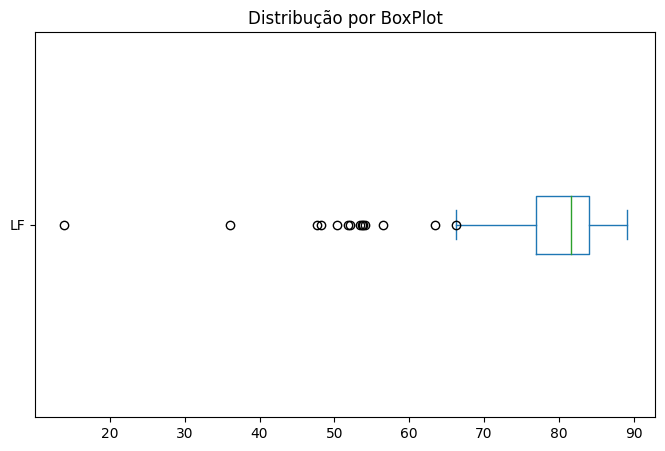

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
series["LF"].plot(kind="box", vert=False, title="Distribução por BoxPlot",ax=ax);

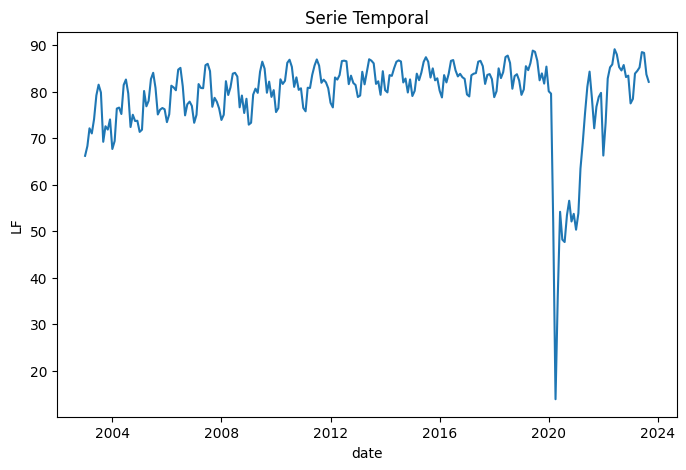

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=series.index, y=series["LF"], data=series, ax=ax)
ax.set_title("Serie Temporal");

In [ ]:
# series = series["LF"].resample("1D").mean().fillna(method="ffill").to_frame()
# series.head()

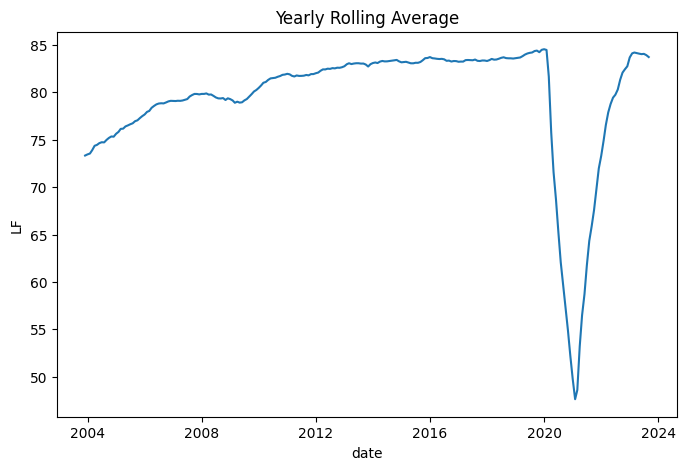

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=series.index, y=series["LF"].rolling(12).mean(), data=series, ax=ax) # 12 meses (1 año)
ax.set_title("Yearly Rolling Average");

In [ ]:
series["LF.L1"] = series["LF"].shift(1)
series.dropna(inplace=True)
series

,LF,LF.L1
date,,
2003-02-01,68.31,66.20
2003-03-01,72.12,68.31
2003-04-01,71.02,72.12
2003-05-01,74.07,71.02
2003-06-01,79.20,74.07
...,...,...
2023-05-01,85.22,84.48
2023-06-01,88.52,85.22
2023-07-01,88.35,88.52


In [ ]:
series.corr() # correlação

,LF,LF.L1
LF,1.000000,0.848614
LF.L1,0.848614,1.000000


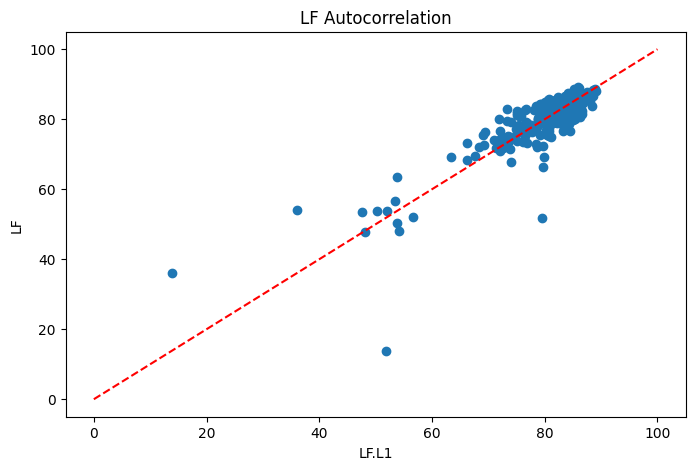

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x=series["LF.L1"], y=series["LF"])
ax.plot([0,100],[0,100],linestyle="--", color="red")
plt.xlabel("LF.L1")
plt.ylabel("LF")
plt.title("LF Autocorrelation");

In [ ]:
# Split the data into featuer and target
target = "LF"
y = series[target]
X = series.drop(columns=target)
# Split the data into train and test sets
cutoff = 203
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [ ]:
X_train.shape, y_train.shape

((203, 1), (203,))

In [ ]:
X_test.shape, y_test.shape

((45, 1), (45,))

In [ ]:
import plotly.express as px
import seaborn as sns
import pytz
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Close LF:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Close LF: 80.99
Baseline MAE: 3.53


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 2.26
Test MAE: 5.41


In [ ]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]
print(f"Close LF = {intercept} + ({coefficient} * LF.L1)")

Close LF = 21.15 + (0.74 * LF.L1)


In [ ]:
df_pred_test = pd.DataFrame(
             {
             "y_test": y_test,
             "y_pred": model.predict(X_test)
             }
)
df_pred_test.head() # 2020 - 2023

,y_test,y_pred
date,,
2020-01-01,80.09,84.320945
2020-02-01,79.58,80.393339
2020-03-01,51.83,80.016111
2020-04-01,13.83,59.490483
2020-05-01,36.02,31.383317


In [ ]:
fig = px.line(df_pred_test, labels={"value": "Close LF"}, title="Linear Regression Model: Actual LF vs. Predicted LF.")
fig.show()

# Other Analysis

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marckcode/IA048A_MachineLearning/main/Trabalho%201/air%20traffic.csv')
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

series = pd.concat([df.iloc[:, -1], df['LF']], axis=1).set_index(df['date']).drop('date', axis=1)

lf = series.loc[:, 'LF']
df = pd.DataFrame({
    'y': lf,
    'y_lag_1': lf.shift(1),
})
df.head()

,y,y_lag_1
date,,
2003-01-01,66.20,NaN
2003-02-01,68.31,66.20
2003-03-01,72.12,68.31
2003-04-01,71.02,72.12
2003-05-01,74.07,71.02


# Multiple Lags

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marckcode/IA048A_MachineLearning/main/Trabalho%201/air%20traffic.csv')
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

series = pd.concat([df.iloc[:, -1], df['LF']], axis=1).set_index(df['date']).drop('date', axis=1)

In [ ]:
# values = pd.DataFrame(series.values)
# dataframe = pd.concat([values.shift(1), values], axis=1)
# dataframe.columns = ['t-1', 't+1']

In [ ]:
lf = series.loc[:, 'LF']
df = pd.DataFrame({
    'y': lf,
    'y_lag_1': lf.shift(1),
    'y_lag_2': lf.shift(2),
})
df.head()

,y,y_lag_1,y_lag_2
date,,,
2003-01-01,66.20,NaN,NaN
2003-02-01,68.31,66.20,NaN
2003-03-01,72.12,68.31,66.20
2003-04-01,71.02,72.12,68.31
2003-05-01,74.07,71.02,72.12


In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf


# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(14, 6))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=20,
    titlepad=14,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.2, h_pad=0.2)
    return fig


# # data_dir = Path("../input/ts-course-data")
# flu_trends = pd.read_csv("https://raw.githubusercontent.com/marckcode/IA048A_MachineLearning/main/Trabalho%201/test/flu-trends.csv")
# flu_trends.set_index(
#     pd.PeriodIndex(flu_trends.Week, freq="W"),
#     inplace=True,
# )
# flu_trends.drop("Week", axis=1, inplace=True)

# ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
# _ = ax.set(ylabel="Office Visits")

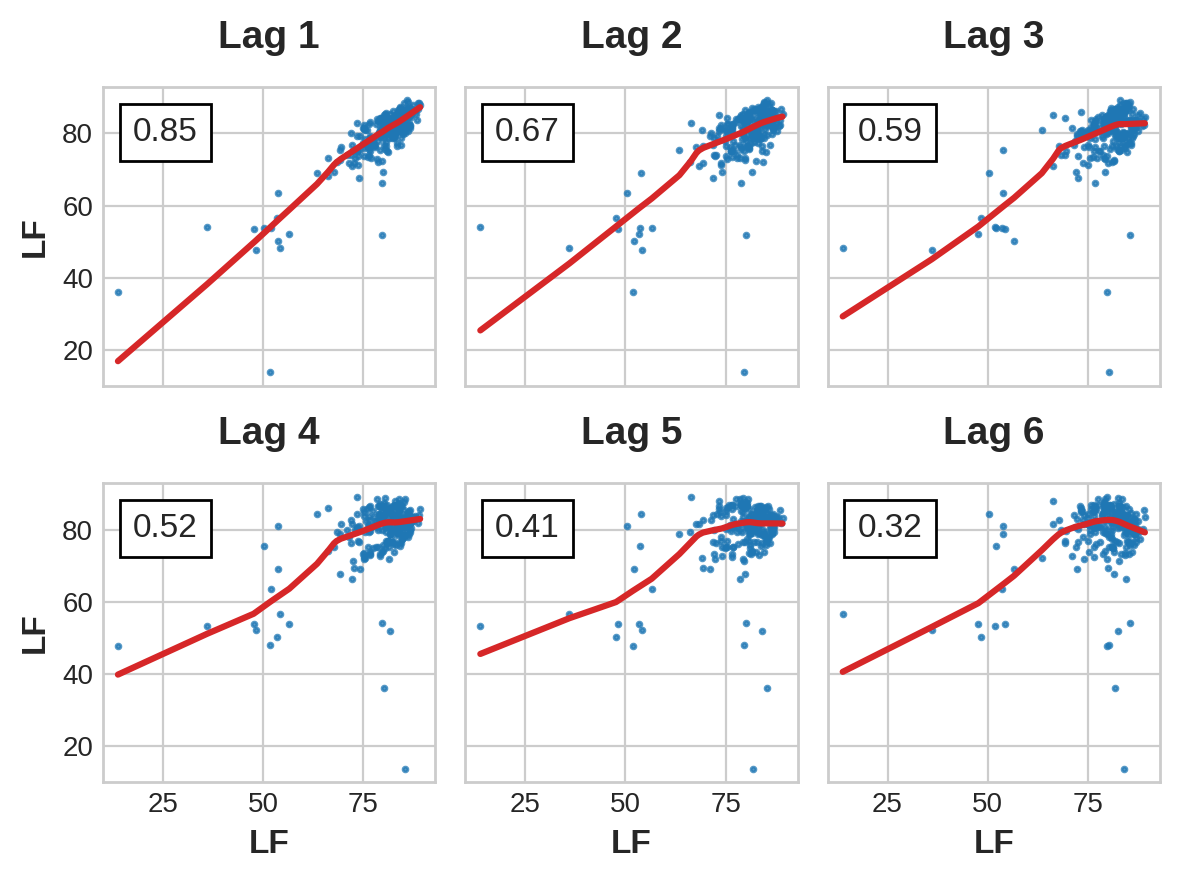

In [ ]:
_ = plot_lags(series.LF, lags=6, nrows=2)
# _ = plot_pacf(series.LF, lags=6)

In [ ]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(series.LF, lags=2)
X = X.fillna(0.0)

In [ ]:
X

,y_lag_1,y_lag_2
date,,
2003-01-01,0.00,0.00
2003-02-01,66.20,0.00
2003-03-01,68.31,66.20
2003-04-01,72.12,68.31
2003-05-01,71.02,72.12
...,...,...
2023-05-01,84.48,83.90
2023-06-01,85.22,84.48
2023-07-01,88.52,85.22


In [ ]:
# Create target series and data splits
y = series.LF.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

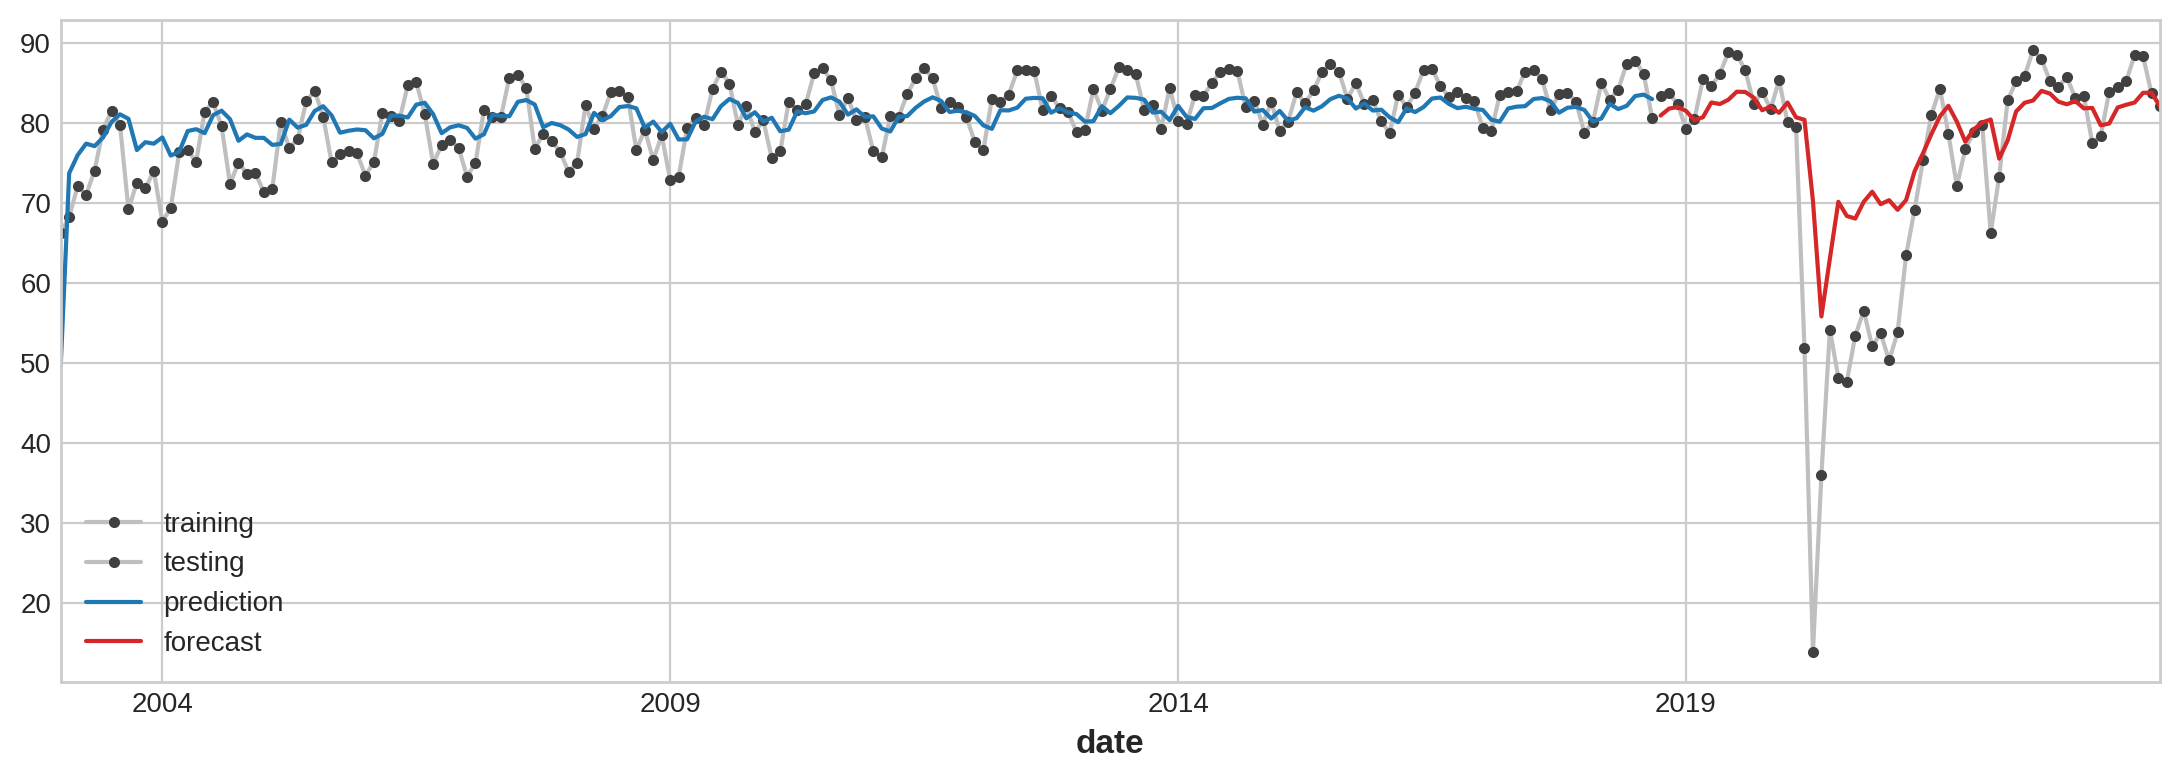

In [ ]:
ax = y_train.plot(**plot_params, label='training')
ax = y_test.plot(**plot_params, label='testing')
ax = y_pred.plot(ax=ax, label='prediction')
_ = y_fore.plot(ax=ax, color='C3', label='forecast')
ax.legend()

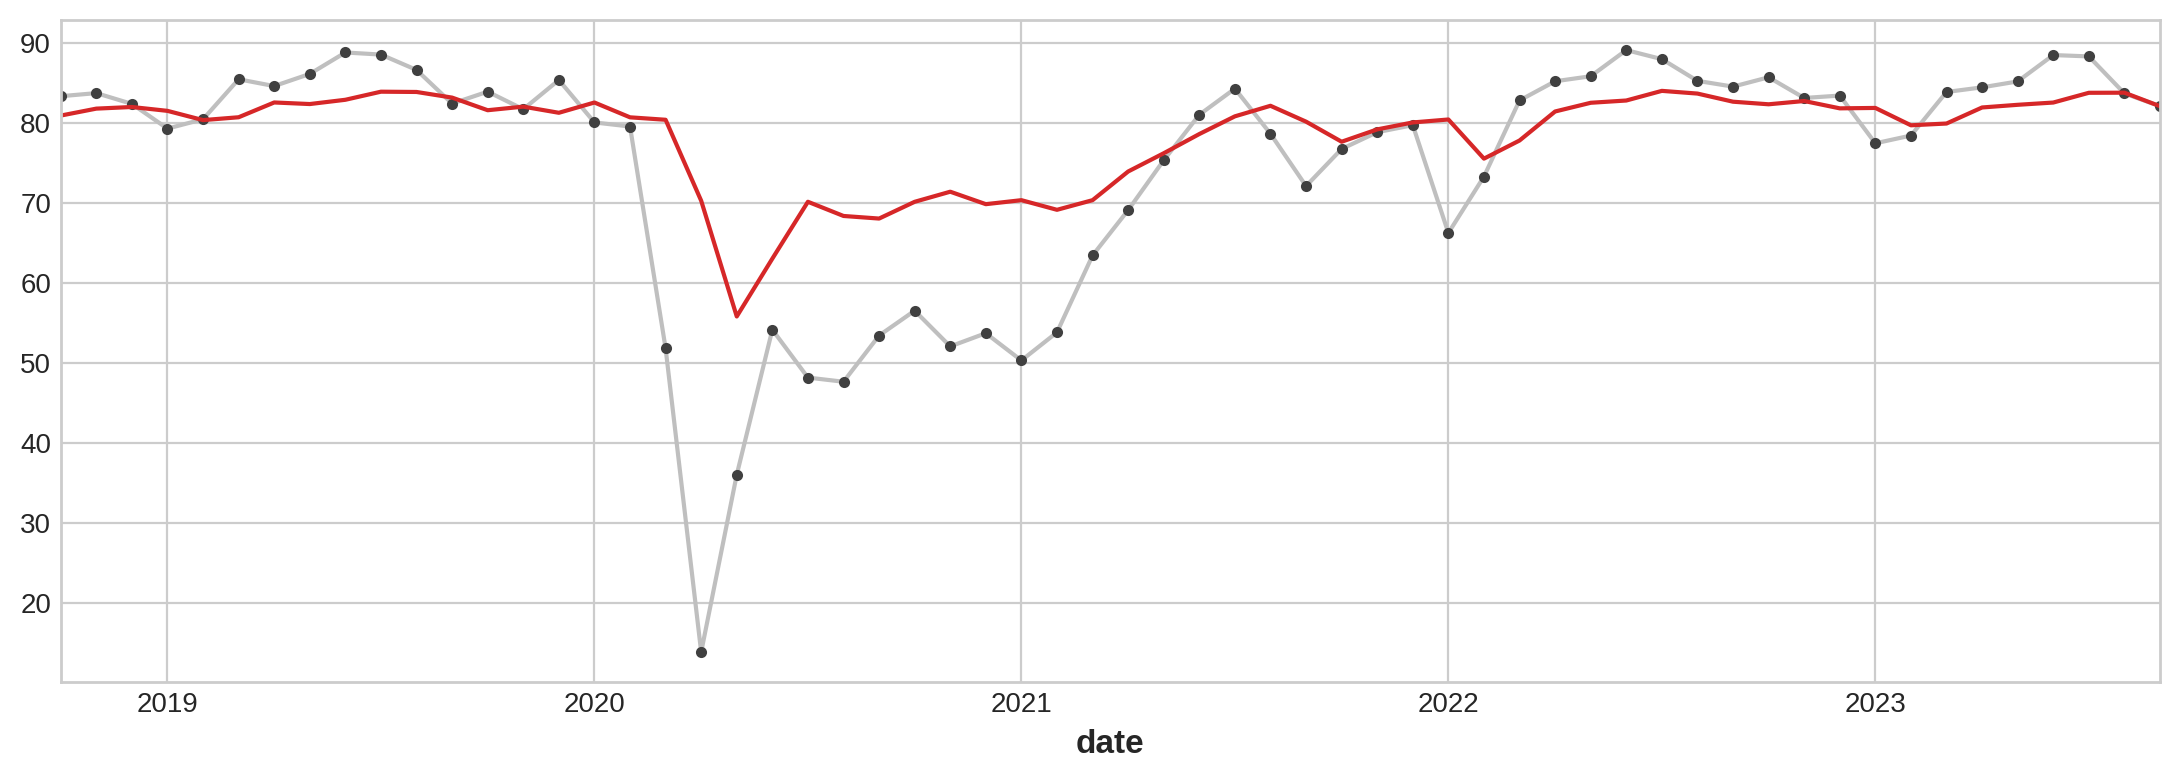

In [ ]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')